In [383]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings as wrn
wrn.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [384]:
df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [386]:
df.shape

(9240, 37)

In [387]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [388]:
df.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [389]:
# converting null values to percentage
(df.isnull().sum().sort_values(ascending = False)/ len(df))*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [390]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [391]:
# check for  duplicated values 
print(df.duplicated().sum())

0


#### so there are no duplicated values in the dataframe. lets now do check for missing values and then we will start analyzing


# Data Cleaning

#### As per the question there are some catergorical variables having select whihc means customers did not answer those questions. So we need to replace them with null values

In [392]:
cols = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [393]:
df = df.replace('Select',np.nan)

In [394]:
cols = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols)

[]


So now there are no select values in the dataframe

In [395]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Checking for null values in the data frame

In [396]:
df.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Lets take 40 percent as the threshhold and coloumns having null values neyond 40 percent would be remnoved from the dataset. 

In [397]:
(df.isnull().sum().sort_values(ascending = False)/len(df)) *100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [398]:
def dropColumns(data, per):
    per_to_drop = 100 * (data.isnull().sum().sort_values(ascending = False)/len(data))
    col = per_to_drop[per_to_drop >= per ].index.to_list()
    print(col)
    data.drop(labels=col,axis=1, inplace=True)

In [399]:
dropColumns(df,40)

['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [400]:
df.shape

(9240, 30)

In [401]:
(df.isnull().sum().sort_values(ascending = False)/len(df)) *100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [403]:
cat_col = list(df.select_dtypes(include=['object']).columns)
len(cat_col)

25

In [404]:
cat_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### let's check the types of data these columns are having which has missing values and then we need to choose how to impute those values or we need to remove those values

In [405]:
column= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for col in column:
        unique_values= df[col].value_counts(normalize=True) *100
        missing_per = df[col].isna().mean() * 100
        print("value_counts % for :",col,"\n")
        print(unique_values,"\n")
        print(f'Missing Values : {missing_per} %')
        print("----------------------------------------------------------------------------------------------","\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

Missing Values : 39.70779220779221 %
---------------------------------------------------------------------------------------------- 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthca

## City:
In city there are 39% missing values and we cant impute it with others so lets remove this.
## Specialization :
for specialization rather removing it we can impute it with others 
## Tags: 
it has more number of missing values and it is the current status or customers. so it would not be helpful in modellling. so removing the column
## What matters most to you in choosing a course: 
as 99 percent used growth and it doesnot provide any insight so removing
## What is your current occupation : 
we can impute the data with unknowm, because we cant say the employement as unemployed or working prefessional or then dont want to show their employement status. so business would be curious more while collecting the data
## Country:
doesnot matter the most. so lets remove this column
## Last Activity:
so for last activity lets impute with mode.

## Lead Source: 
again only 1 % missing values , so impute with mode 

So dropping city, Tags, Country and What matters most to you in choosing a course

In [406]:
df.drop(['City','Tags','What matters most to you in choosing a course','Country'],inplace = True,axis = 1)

In [407]:
df.shape

(9240, 26)

In [408]:
(df.isnull().sum().sort_values(ascending = False)/len(df)) *100

Specialization                              36.580087
What is your current occupation             29.112554
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
X Education Forums                           0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Newspaper                                    0.000000
Search                                       0.000000
Newspaper Article                            0.000000
Magazine                    

In [409]:
df['Specialization'] = df['Specialization'].fillna('Others')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unknown')
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])
df['Last Activity'] = df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [410]:
(df.isnull().sum().sort_values(ascending = False)/len(df)) *100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
Magazine                                    0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Newspaper Article                           0.000000
Search                                      0.000000
Lead Number                                 0.000000
What is your current occupation             0.000000
Specialization                              0.000000
Last Activity                               0.

In [411]:
num_col = ['TotalVisits','Page Views Per Visit','Lead Number','Converted','Total Time Spent on Website']

In [412]:
df.TotalVisits.value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [413]:
n_col = ['TotalVisits','Page Views Per Visit']
for col in n_col:
    mean = df[col].mean()
    median = df[col].median()
    skew = df[col].skew()
    print(f'Mean:  {mean}')
    print(f'Median:  {median}')
    print(f'Skewness:  {skew}')
    print('------------------------------------------')

Mean:  3.445237833681204
Median:  3.0
Skewness:  19.911657340056212
------------------------------------------
Mean:  2.3628199494672093
Median:  2.0
Skewness:  2.871792896566408
------------------------------------------


Though total visits is a numerical column but it is not continuous variable and acts as categorical variable anmd therefore lest impote it with mode, and same for the Page Views Per Visit

In [414]:
for col in n_col:
    df[col].fillna(df[col].mode()[0],inplace = True)

In [415]:
(df.isnull().sum().sort_values(ascending = False)/len(df)) *100

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

#### Removing the unwanted columns like prospect ID, Lead Number

In [416]:
df.drop(['Prospect ID','Lead Number'],inplace = True, axis = 1)

In [417]:
df.shape

(9240, 24)

In [418]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [419]:
# here we can drop this column as this is not significant 
df.drop('Last Notable Activity',axis = 1 , inplace = True)

In [420]:
df.shape

(9240, 23)

### lets handel the columns having only one response as these would not be significant for our model because the customers has given the same response and there is no variation 

In [421]:
df.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,19,7,2,1,2,2,2,2,2,1,1,1,1,2
top,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
freq,4886,2904,8506,9238,3540,3380,5600,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352


In [422]:
df.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

here some columns are having only one value as response and we need to remove those

In [423]:
cl_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque']

In [424]:
df.drop(cl_to_drop,axis = 1, inplace = True)

In [425]:
df.shape

(9240, 18)

### Lets check for other columns having highly skewed data and we can drop them 

value_counts % for : Lead Origin 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

unique value in percentage: 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 



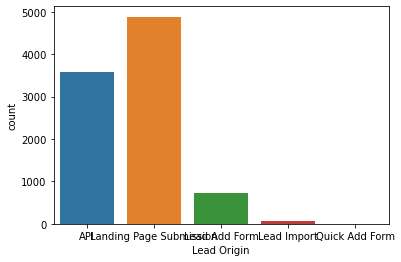

---------------------------------------------------------------------------------------------- 

value_counts % for : Lead Source 

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

unique value in percentage: 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing      

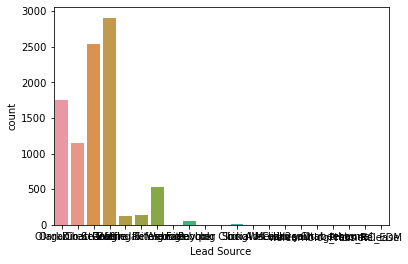

---------------------------------------------------------------------------------------------- 

value_counts % for : Do Not Email 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

unique value in percentage: 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 



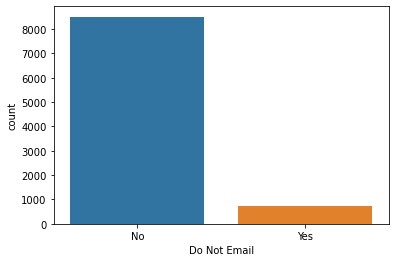

---------------------------------------------------------------------------------------------- 

value_counts % for : Do Not Call 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

unique value in percentage: 

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64 



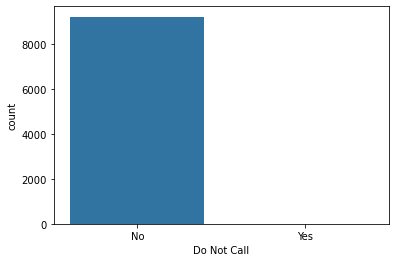

---------------------------------------------------------------------------------------------- 

value_counts % for : Last Activity 

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64 

unique value in percentage: 

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Con

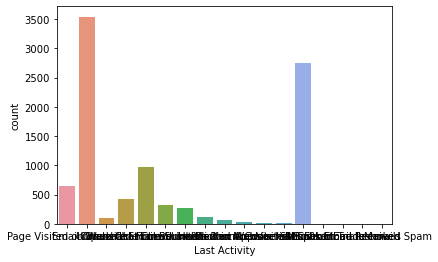

---------------------------------------------------------------------------------------------- 

value_counts % for : Specialization 

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64 

unique value in percentage: 



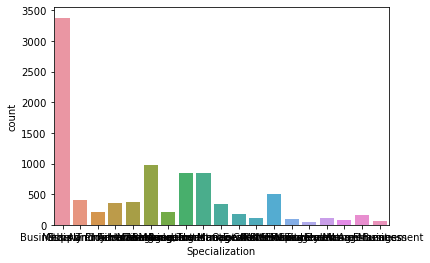

---------------------------------------------------------------------------------------------- 

value_counts % for : What is your current occupation 

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64 

unique value in percentage: 

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64 



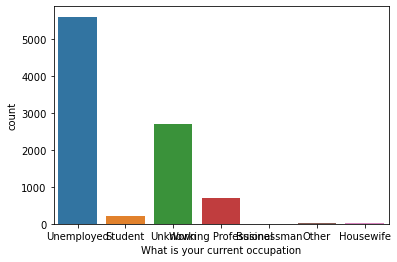

---------------------------------------------------------------------------------------------- 

value_counts % for : Search 

No     9226
Yes      14
Name: Search, dtype: int64 

unique value in percentage: 

No     99.848485
Yes     0.151515
Name: Search, dtype: float64 



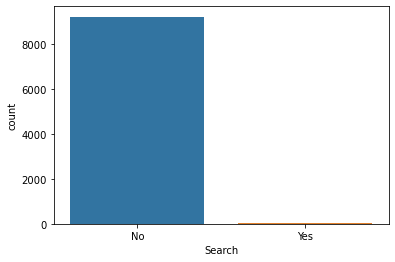

---------------------------------------------------------------------------------------------- 

value_counts % for : Newspaper Article 

No     9238
Yes       2
Name: Newspaper Article, dtype: int64 

unique value in percentage: 

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64 



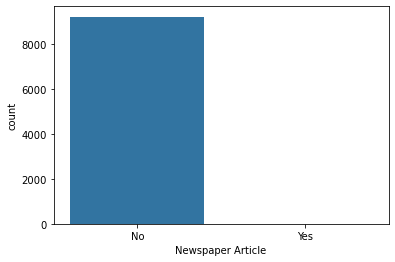

---------------------------------------------------------------------------------------------- 

value_counts % for : X Education Forums 

No     9239
Yes       1
Name: X Education Forums, dtype: int64 

unique value in percentage: 

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64 



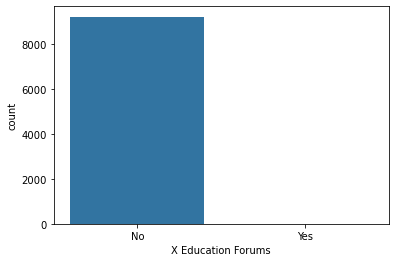

---------------------------------------------------------------------------------------------- 

value_counts % for : Newspaper 

No     9239
Yes       1
Name: Newspaper, dtype: int64 

unique value in percentage: 

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64 



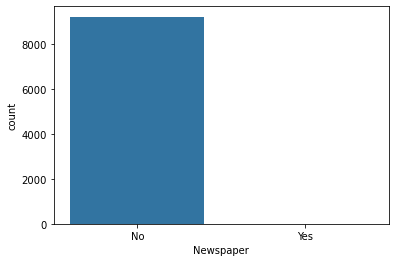

---------------------------------------------------------------------------------------------- 

value_counts % for : Digital Advertisement 

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64 

unique value in percentage: 

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64 



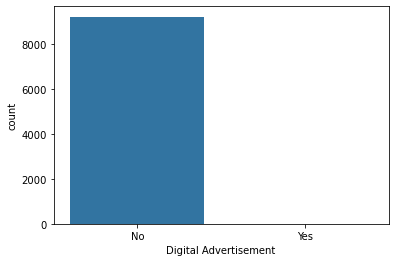

---------------------------------------------------------------------------------------------- 

value_counts % for : Through Recommendations 

No     9233
Yes       7
Name: Through Recommendations, dtype: int64 

unique value in percentage: 

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64 



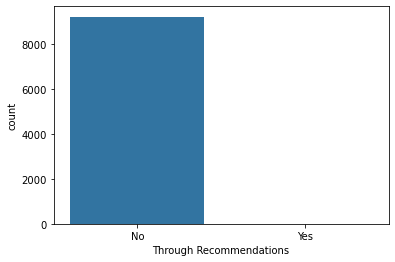

---------------------------------------------------------------------------------------------- 

value_counts % for : A free copy of Mastering The Interview 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 

unique value in percentage: 

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64 



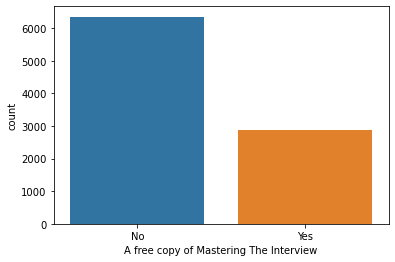

---------------------------------------------------------------------------------------------- 



In [426]:
ct_col = list(df.select_dtypes(include=['object']).columns)
for col in ct_col:
        unique_values= df[col].value_counts()
        uni_per = df[col].value_counts(normalize= True) *100
        print("value_counts % for :",col,"\n")
        print(unique_values,"\n")
        print('unique value in percentage:',"\n")
        print(uni_per,'\n')
        sns.countplot(x = col , data = df);
        plt.show()
        print("----------------------------------------------------------------------------------------------","\n")

## some of the data points having only 1 data values as variant responses and we could not get any significant outcome from these data , so removing such columns. These columns are as follows.
 Do Not Call,
 Search,
 Newspaper Article,
 X Education Forums,
 Newspaper,
 Digital Advertisement,
 Through Recommendations,

In [427]:
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
         'Digital Advertisement','Through Recommendations'],axis=1, inplace = True)

In [428]:
df.shape

(9240, 11)

In [429]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### Now Data is clean and lets do EDA

## EDA

In [430]:
df_lead = df # creating a copy of dataset 

In [431]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### Numerical Variable Analysis

In [432]:
n_col = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

printing for the column Converted


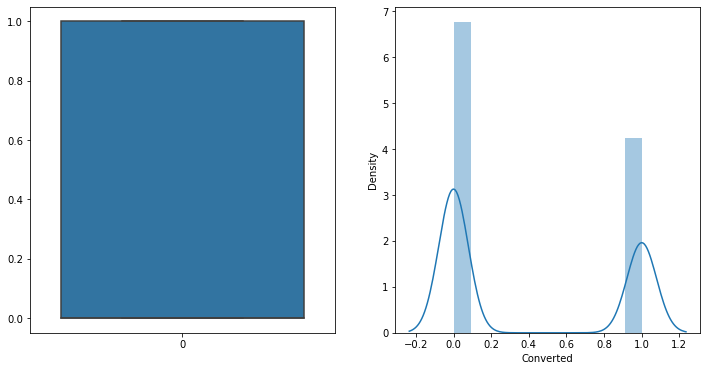

---------------------------------------------------------------------------------------
printing for the column TotalVisits


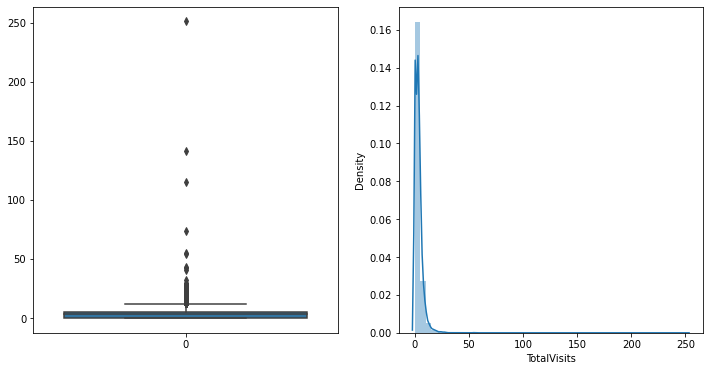

---------------------------------------------------------------------------------------
printing for the column Total Time Spent on Website


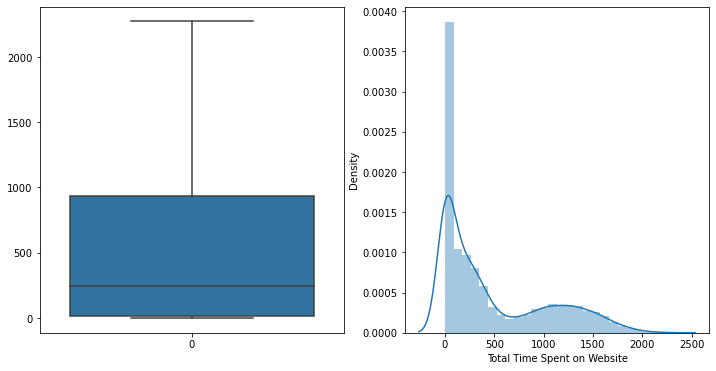

---------------------------------------------------------------------------------------
printing for the column Page Views Per Visit


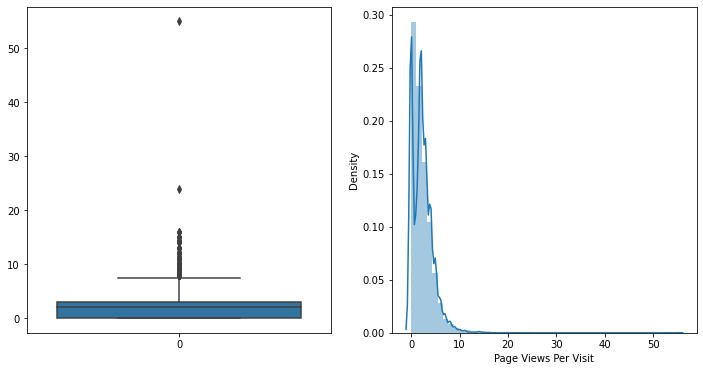

---------------------------------------------------------------------------------------


In [433]:
for col in n_col:
    plt.figure(figsize = (12,6))
    print(f'printing for the column {col}')
    
    plt.subplot(1,2,1)
    sns.boxplot(data = df_lead[col], orient="v")
    
    plt.subplot(1,2,2)
    sns.distplot(df_lead[col])
    plt.show()
    
    print('---------------------------------------------------------------------------------------')

## As the data having lots of anomalies and ouitliers so it needs to be handeled. 

In [434]:
df_lead.describe(percentiles = [0.10,0.20,0.25,0.50,0.75,0.90,0.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


In [435]:
#create a function for outlier treatment
def Outlier(df_lead,column):
    for col in column:
        q1 = df_lead[col].describe()["25%"]
        q3 = df_lead[col].describe()["75%"]
        IQR = q3 - q1

        upper = q3 + 1.5*IQR
        lower = q1 - 1.5*IQR

        df_lead[col] = np.where(df_lead[col] > upper, upper,df_lead[col])

        df_lead[col] = np.where(df_lead[col] < lower, lower,df_lead[col])

In [436]:
column = ["Page Views Per Visit","TotalVisits"]
Outlier(df_lead,column)

printing for the column Converted


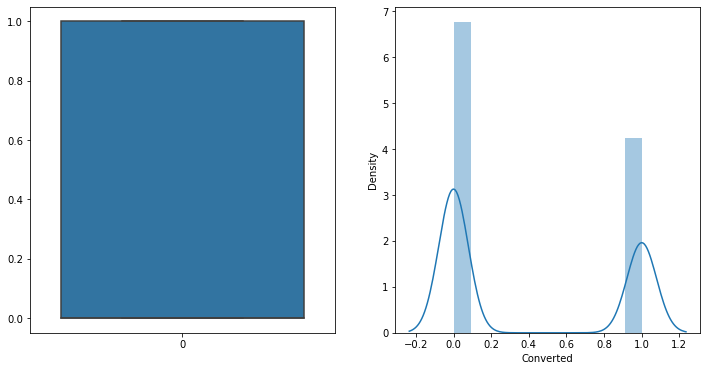

---------------------------------------------------------------------------------------
printing for the column TotalVisits


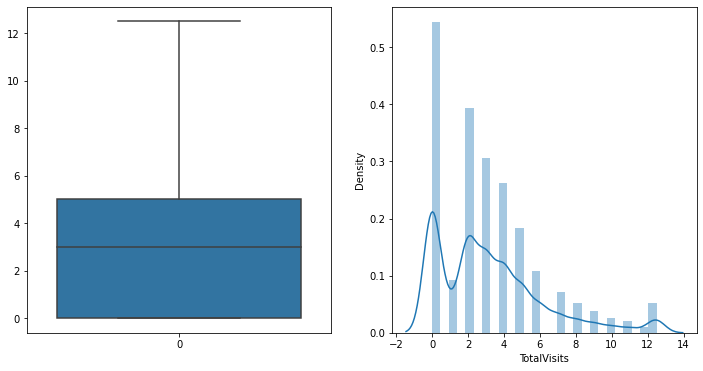

---------------------------------------------------------------------------------------
printing for the column Total Time Spent on Website


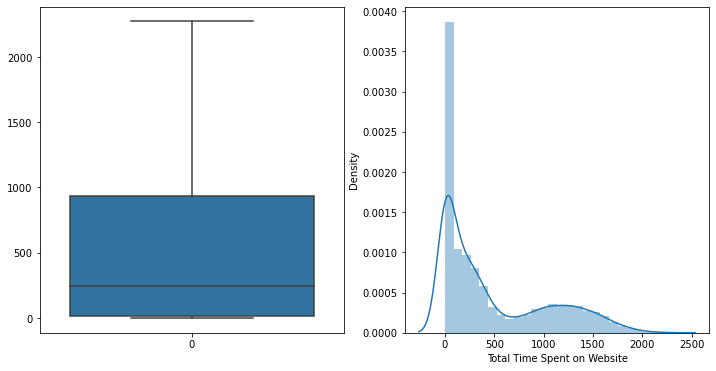

---------------------------------------------------------------------------------------
printing for the column Page Views Per Visit


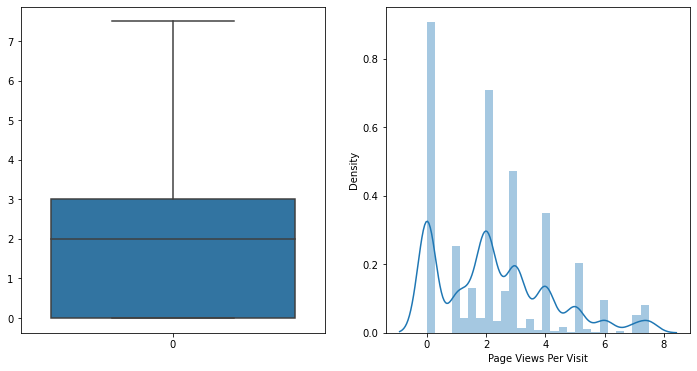

---------------------------------------------------------------------------------------


In [437]:
for col in n_col:
    plt.figure(figsize = (12,6))
    print(f'printing for the column {col}')
    
    plt.subplot(1,2,1)
    sns.boxplot(data = df_lead[col], orient="v")
    
    plt.subplot(1,2,2)
    sns.distplot(df_lead[col])
    plt.show()
    
    print('---------------------------------------------------------------------------------------')

### ouliers has been handeled

## check for data and fortmats

In [438]:
cat_col = list(df_lead.select_dtypes(include=['object']).columns)
for col in cat_col:
        unique_values= df[col].value_counts(normalize=True) *100
        missing_per = df[col].isna().mean() * 100
        print("value_counts % for :",col,"\n")
        print(unique_values,"\n")
        print(f'Missing Values : {missing_per} %')
        print("----------------------------------------------------------------------------------------------","\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

Missing Values : 0.0 %
---------------------------------------------------------------------------------------------- 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823


As we can see that there are lots of columns in Last activity and lead score are very few numbers we can map them to others because it would create lots of unnecessary data in dummmy variables. 

also in lead source spelling is Goole and google is there , so we would clear them too. 

In [439]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace("google","Google")

In [440]:
df_lead['Lead Source'] = df_lead['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [441]:
df_lead['Last Activity'] = df_lead['Last Activity'].replace(['Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails',],'Others')

In [442]:
df_lead['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Others                        112
Unreachable                    93
Name: Last Activity, dtype: int64

In [443]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [444]:
#converting yes no to 0 and 1
df_lead['Do Not Email'] = df_lead['Do Not Email'].apply(lambda x:0 if x=='No' else 1)
df_lead['A free copy of Mastering The Interview'] = df_lead['A free copy of Mastering The Interview'].apply(lambda x:0 if x=='No' else 1)


In [445]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

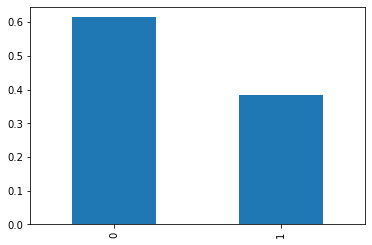

In [447]:
df_lead.Converted.value_counts(normalize = True).plot.bar();

### So we can see that there are more number of leads i.e around 60 percent leads are not converted and around 38 percent leads are converted. 

In [448]:
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

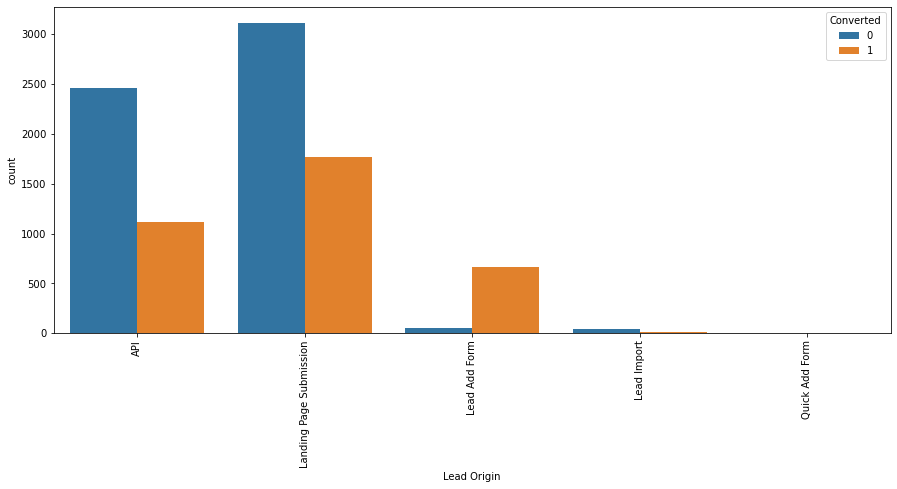

-------------------------------------------------------------------------------------------


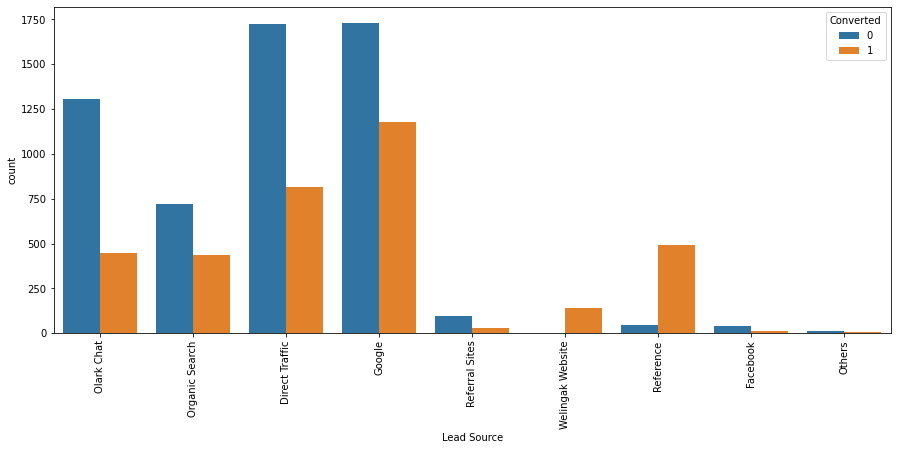

-------------------------------------------------------------------------------------------


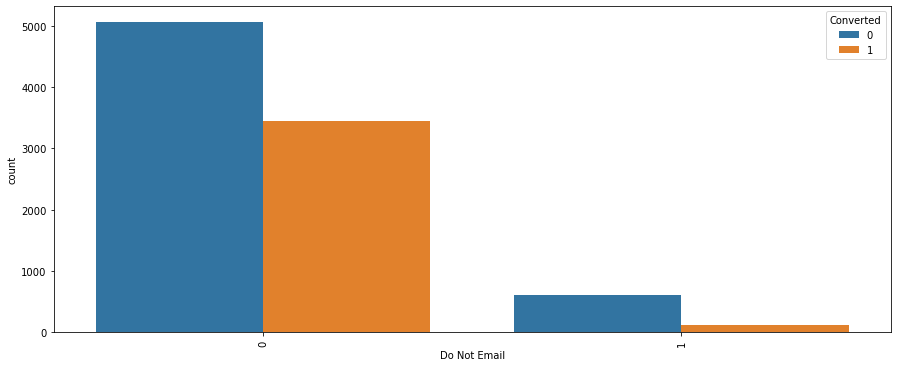

-------------------------------------------------------------------------------------------


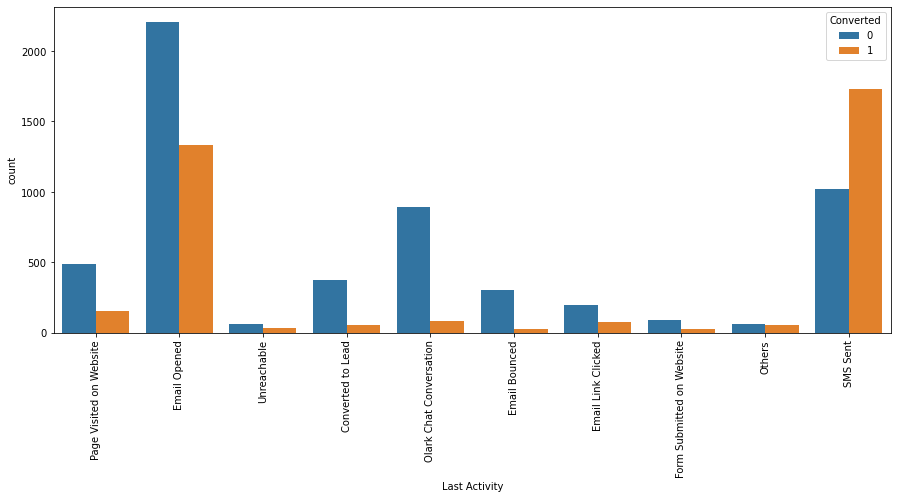

-------------------------------------------------------------------------------------------


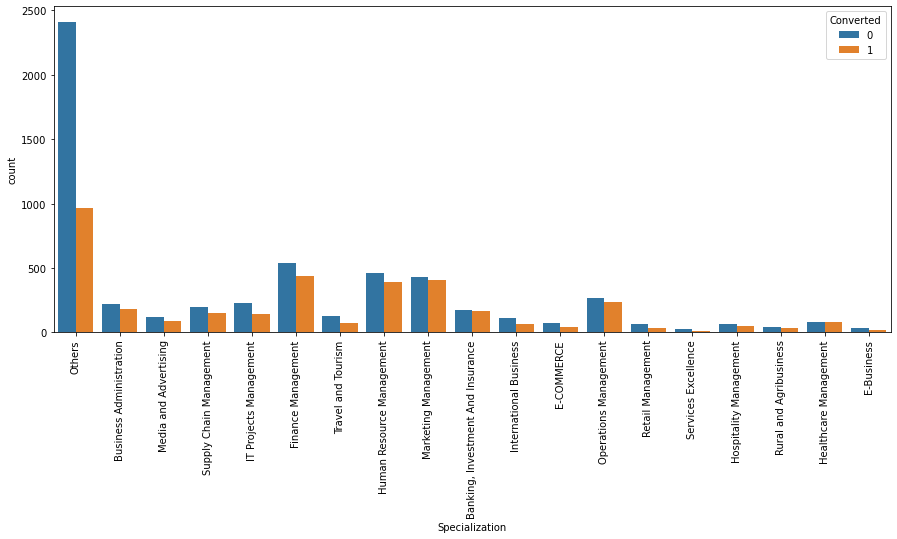

-------------------------------------------------------------------------------------------


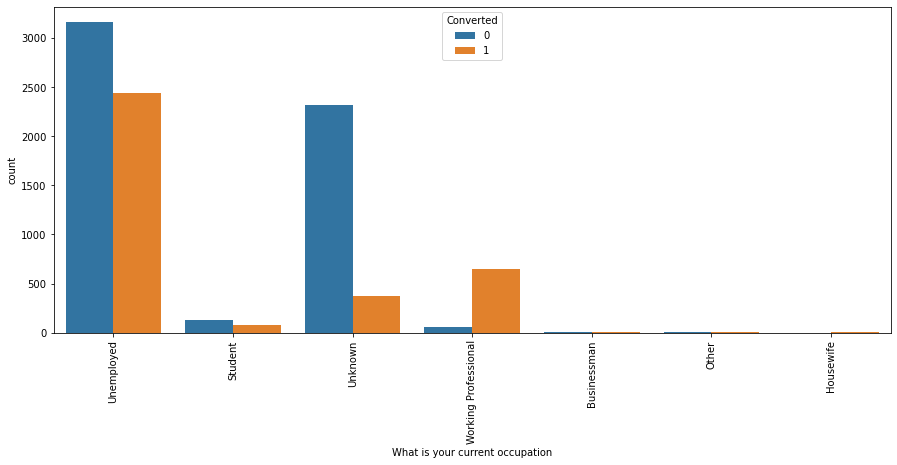

-------------------------------------------------------------------------------------------


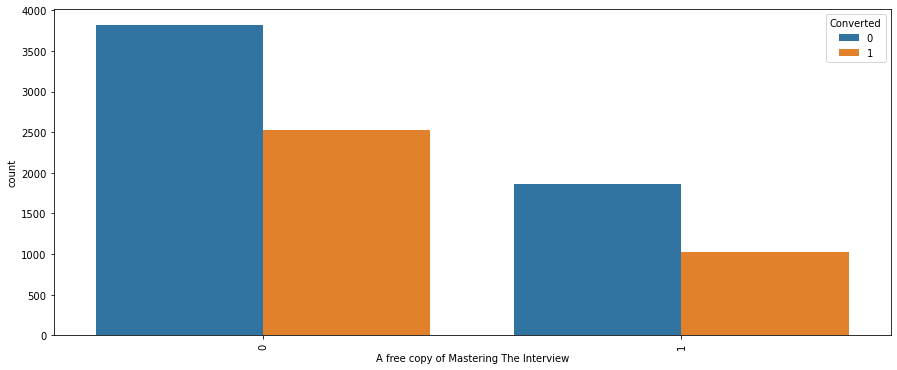

-------------------------------------------------------------------------------------------


In [449]:
for col in cat_col:
    plt.figure(figsize=(15,6))
    sns.countplot(df[col],hue = df.Converted)
    plt.xticks(rotation = 90)
    plt.show()
    print('-------------------------------------------------------------------------------------------')

#### Lead origin: from lead origin Landing page submission identified the most and then API. but the highest succes rate is for Lead add form.

#### Direct Traffic and Google leads the Lead source but the people coming from reference are more converted. 

#### Working professionals are highly converted .

In [450]:
d1 = df_lead[df_lead.Converted == 1]
d0 = df_lead[df_lead.Converted == 0]


In [451]:
d0.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
5,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Others,Unknown,0
7,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Others,Unknown,0


Plotting for Lead Origin  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

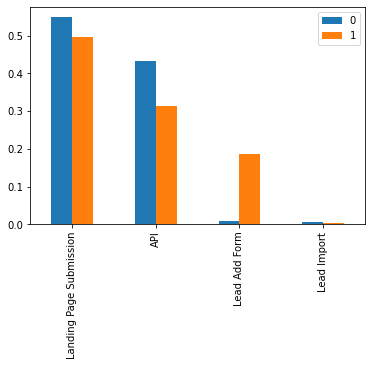

-------------------------------------------------------------------------------------------
Plotting for Lead Source  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

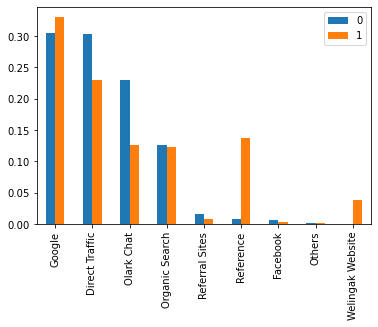

-------------------------------------------------------------------------------------------
Plotting for Do Not Email  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

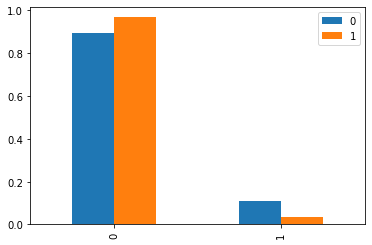

-------------------------------------------------------------------------------------------
Plotting for Last Activity  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

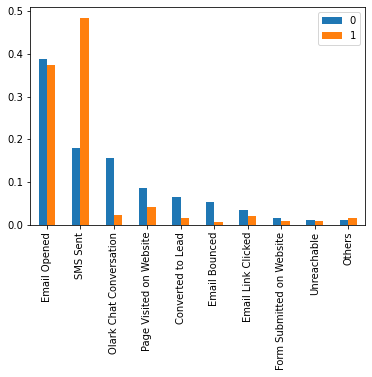

-------------------------------------------------------------------------------------------
Plotting for Specialization  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

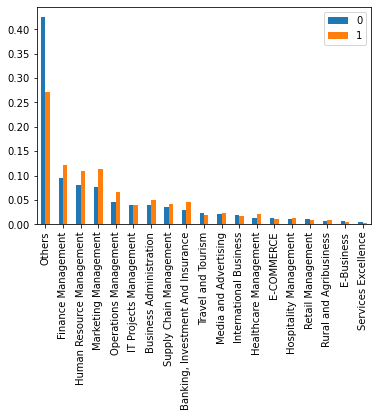

-------------------------------------------------------------------------------------------
Plotting for What is your current occupation  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

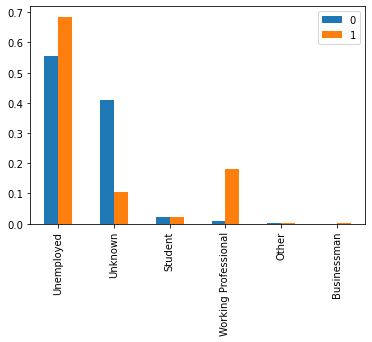

-------------------------------------------------------------------------------------------
Plotting for A free copy of Mastering The Interview  in terms opf percentage or converted 


<Figure size 1080x432 with 0 Axes>

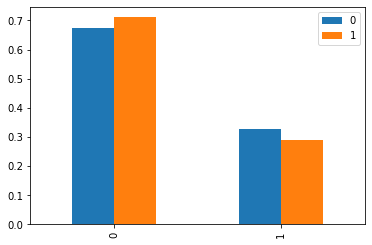

-------------------------------------------------------------------------------------------


In [452]:
for col in cat_col:
    print(f'Plotting for {col}  in terms opf percentage or converted ')
    plt.figure(figsize=(15,6))
    data = pd.DataFrame()
    data['0'] = ((d0[col].value_counts())/len(d0))
    data['1'] =((d1[col].value_counts())/len(d1))
    data.plot.bar();
    plt.xticks(rotation = 90)
    plt.show();
    print('-------------------------------------------------------------------------------------------')

#### In terms of percentage people coming from Google and reference are higly converted.

#### in terms or converted percentage unemployed and working professionals are high.

# for numerical columns

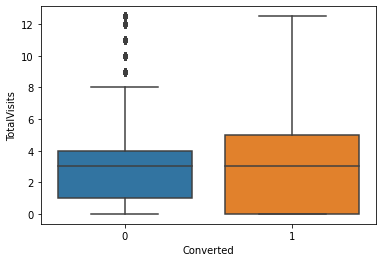

-----------------------------------------------------------------------------------------------------


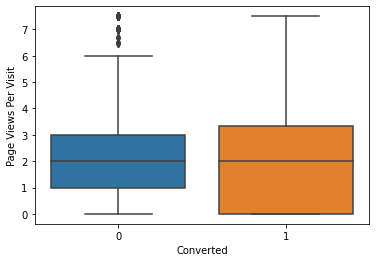

-----------------------------------------------------------------------------------------------------


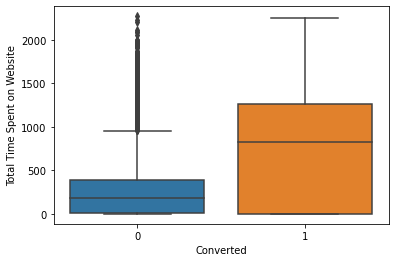

-----------------------------------------------------------------------------------------------------


In [453]:
numcol = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
for col in numcol:
    sns.boxplot(y = col, x = 'Converted', data = df_lead)
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')

### Some data is having some anomalies which will be handeled when we normalize this values . 
### Who spent more time on website are coverted more than those spent less time 

<Figure size 1152x288 with 0 Axes>

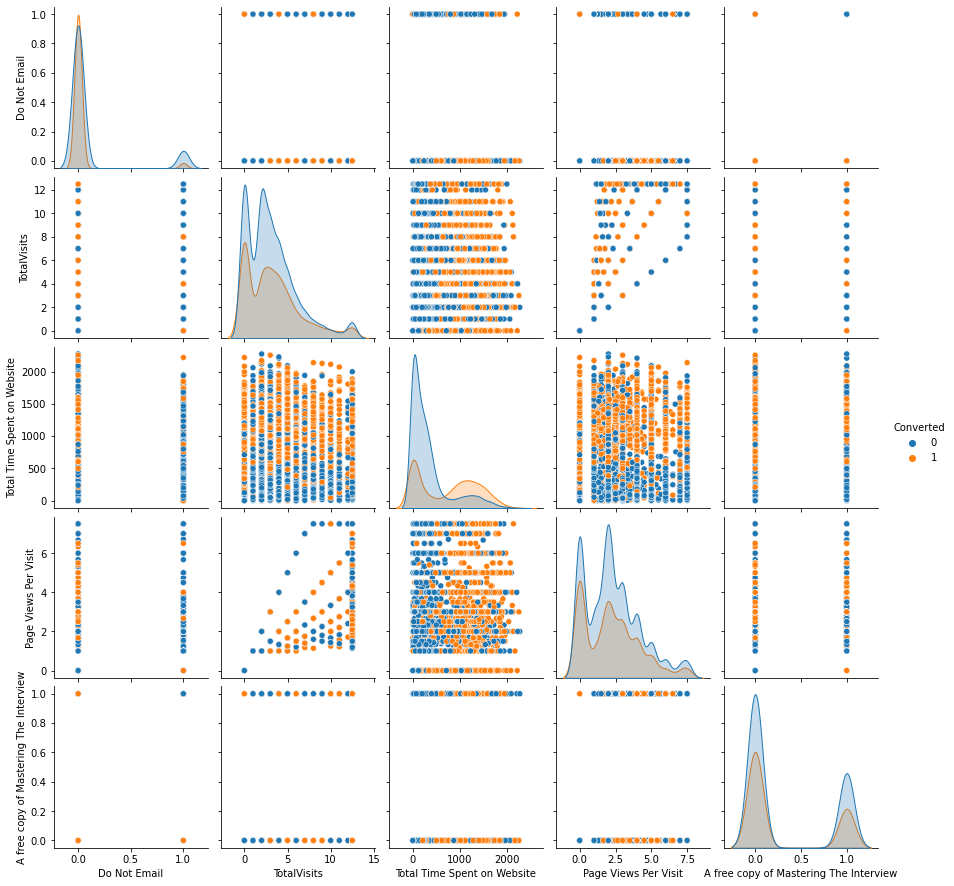

In [454]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_lead,hue="Converted")                                  
plt.show()

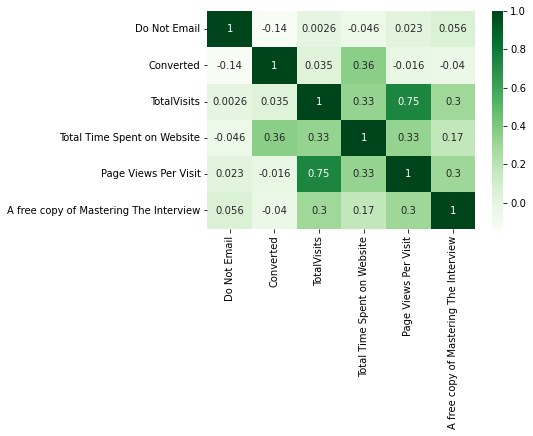

In [455]:
# Creating Heat Map
sns.heatmap(data=df_lead.corr(),cmap="Greens",annot=True)
plt.show()

### From heat map we can see that Total time spent on web site is somewhat correlated with the conversionrate.

# lets start with modelling

### Dummy Variable creation for all categorical variables

In [456]:
lead_df = df_lead

In [457]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [458]:
lead_df = pd.get_dummies(data=lead_df,columns=["Lead Origin","Lead Source","Last Activity"
                                              ,"Specialization","What is your current occupation"],drop_first=True)

In [459]:
lead_df.shape

(9240, 51)

In [460]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

### Train Test Split

In [461]:
y = lead_df['Converted']

In [462]:
X = lead_df.drop('Converted',axis=1)

In [463]:
X.shape

(9240, 50)

In [464]:
y.shape

(9240,)

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [466]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (7392, 50) 
y_train: (7392,)
X_test: (1848, 50) 
y_test: (1848,)


### Feature scaling by MinMax Scalar

In [467]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [468]:
ncols = X_train.select_dtypes(include=['int64','float64']).columns

In [469]:
ncols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [470]:
# checking for values whihc needs scaling 
for col in ncols:
    print(lead_df[col].value_counts())
    print('----'*30)

0    8506
1     734
Name: Do Not Email, dtype: int64
------------------------------------------------------------------------------------------------------------------------
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
12.5     222
9.0      164
10.0     114
11.0      86
12.0      45
Name: TotalVisits, dtype: int64
------------------------------------------------------------------------------------------------------------------------
0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64
------------------------------------------------------------------------------------------------------------------------
0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.21       1
3.43       1
2.56       1
6.33       1
2.08       1
Name: Page Views Per V

In [471]:
ncol = ['Page Views Per Visit','Total Time Spent on Website','TotalVisits']

In [472]:
scaler = MinMaxScaler()
X_train[ncol] = scaler.fit_transform(X_train[ncol])

In [473]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
6487,1,0.16,0.105194,0.266667,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4759,0,0.00,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4368,0,0.24,0.174296,0.400000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1467,0,0.32,0.393486,0.533333,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5517,0,0.16,0.062940,0.266667,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [474]:
# check the lead conversion rate LCR
LCR = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
LCR

38.53896103896104

## Model Building

### Feature selection using RFE

In [475]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [476]:
# Check for the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on We

## lets choose the top 20 features 

In [477]:
top20 = pd.DataFrame()
top20['features']=X_train.columns
top20['Feature Chosen'] = rfe.support_
top20['Ranking']=rfe.ranking_
top20.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
47,What is your current occupation_Unemployed,True,1
46,What is your current occupation_Student,True,1
44,What is your current occupation_Housewife,True,1
38,Specialization_Others,True,1
31,Specialization_Hospitality Management,True,1
25,Last Activity_Unreachable,True,1
48,What is your current occupation_Unknown,True,1
22,Last Activity_Others,True,1
21,Last Activity_Olark Chat Conversation,True,1


In [478]:
# columns which are selected by RFE
rfe_col = list(X_train.columns[rfe.support_])
rfe_col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Hospitality Management',
 'Specialization_Others',
 'What is your current occupation_Housewife',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Unknown',
 'What is your current occupation_Working Professional']

In [479]:
# function to create VIF
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

In [480]:
# function to create model
def model_build(column):

    X_train_rfe = X_train[column]

    # Adding a constant variable 
    X_train_sm = sm.add_constant(X_train_rfe)

    # Create a fitted model
    logm = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()  

    print(logm.summary())
    return logm

## Model 1:

In [481]:
rfecol = rfe_col # taking the clopy of the rfe choosen columns


In [482]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2972.7
Date:                Tue, 25 Jul 2023   Deviance:                       5945.4
Time:                        16:34:40   Pearson chi2:                 7.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [483]:
get_vif(X_train[rfecol])

,Features,VIF
0,What is your current occupation_Unemployed,13.76
1,What is your current occupation_Unknown,7.53
2,Lead Origin_Landing Page Submission,7.26
3,Page Views Per Visit,7.04
4,TotalVisits,5.05
5,Specialization_Others,4.67
6,Last Activity_Email Opened,3.40
7,Lead Source_Olark Chat,2.90
8,Last Activity_SMS Sent,2.82
9,What is your current occupation_Working Profes...,2.51


What is your current occupation_Housewife  dropped as the p value is 0.999

# Model 2

In [484]:
rfecol.remove('What is your current occupation_Housewife')

In [485]:
len(rfecol)

19

In [486]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2975.8
Date:                Tue, 25 Jul 2023   Deviance:                       5951.7
Time:                        16:34:40   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [487]:
get_vif(X_train[rfecol])

,Features,VIF
0,What is your current occupation_Unemployed,13.48
1,What is your current occupation_Unknown,7.39
2,Lead Origin_Landing Page Submission,7.19
3,Page Views Per Visit,7.04
4,TotalVisits,5.05
5,Specialization_Others,4.64
6,Last Activity_Email Opened,3.38
7,Lead Source_Olark Chat,2.88
8,Last Activity_SMS Sent,2.81
9,What is your current occupation_Working Profes...,2.47


remove What is your current occupation_Working Professional

# Model 3

In [488]:
rfecol.remove("What is your current occupation_Working Professional")

In [489]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2976.5
Date:                Tue, 25 Jul 2023   Deviance:                       5953.0
Time:                        16:34:41   Pearson chi2:                 7.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [490]:
get_vif(X_train[rfecol])

,Features,VIF
0,Page Views Per Visit,6.90
1,What is your current occupation_Unemployed,6.70
2,Lead Origin_Landing Page Submission,5.79
3,TotalVisits,4.95
4,What is your current occupation_Unknown,4.24
5,Specialization_Others,4.05
6,Last Activity_Email Opened,3.04
7,Lead Source_Olark Chat,2.53
8,Last Activity_SMS Sent,2.52
9,Total Time Spent on Website,2.14


### Remove Page Views Per Visit as per vif

# Model 4

In [491]:
rfecol.remove("Page Views Per Visit")

In [492]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2988.3
Date:                Tue, 25 Jul 2023   Deviance:                       5976.5
Time:                        16:34:41   Pearson chi2:                 7.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [493]:
get_vif(X_train[rfecol])

,Features,VIF
0,What is your current occupation_Unemployed,6.60
1,Lead Origin_Landing Page Submission,5.59
2,What is your current occupation_Unknown,4.19
3,Specialization_Others,4.05
4,TotalVisits,3.12
5,Last Activity_Email Opened,2.93
6,Last Activity_SMS Sent,2.41
7,Lead Source_Olark Chat,2.36
8,Total Time Spent on Website,2.14
9,Last Activity_Olark Chat Conversation,1.85


# Model 5

In [494]:
# Remove What is your current occupation_Unemployed
rfecol.remove("What is your current occupation_Unemployed")

In [495]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3106.1
Date:                Tue, 25 Jul 2023   Deviance:                       6212.3
Time:                        16:34:41   Pearson chi2:                 7.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3869
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [496]:
get_vif(X_train[rfecol])

,Features,VIF
0,Lead Origin_Landing Page Submission,3.80
1,TotalVisits,2.95
2,Specialization_Others,2.85
3,Last Activity_Email Opened,2.74
4,Last Activity_SMS Sent,2.32
5,Lead Source_Olark Chat,2.23
6,Total Time Spent on Website,2.12
7,Last Activity_Olark Chat Conversation,1.82
8,What is your current occupation_Unknown,1.62
9,Lead Origin_Lead Add Form,1.52


# Model 6:


In [497]:
# remove What is your current occupation_Student
rfecol.remove("What is your current occupation_Student")

In [498]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3106.2
Date:                Tue, 25 Jul 2023   Deviance:                       6212.4
Time:                        16:34:41   Pearson chi2:                 7.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3869
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [499]:
get_vif(X_train[rfecol])

,Features,VIF
0,Lead Origin_Landing Page Submission,3.78
1,TotalVisits,2.95
2,Specialization_Others,2.84
3,Last Activity_Email Opened,2.74
4,Last Activity_SMS Sent,2.32
5,Lead Source_Olark Chat,2.23
6,Total Time Spent on Website,2.12
7,Last Activity_Olark Chat Conversation,1.82
8,What is your current occupation_Unknown,1.60
9,Lead Origin_Lead Add Form,1.51


# Model 7:

In [500]:
# remove Specialization_Hospitality Management
rfecol.remove("Specialization_Hospitality Management")

In [501]:
model_build(rfecol)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3107.8
Date:                Tue, 25 Jul 2023   Deviance:                       6215.6
Time:                        16:34:41   Pearson chi2:                 7.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [502]:
get_vif(X_train[rfecol])

,Features,VIF
0,Lead Origin_Landing Page Submission,3.77
1,TotalVisits,2.95
2,Specialization_Others,2.83
3,Last Activity_Email Opened,2.74
4,Last Activity_SMS Sent,2.32
5,Lead Source_Olark Chat,2.23
6,Total Time Spent on Website,2.12
7,Last Activity_Olark Chat Conversation,1.82
8,What is your current occupation_Unknown,1.60
9,Lead Origin_Lead Add Form,1.51


### So model 7 is our final model having all the vif values under 5 and all the p values <0.05 Now lets move to model evaluation

# Model Evaluation 
Confusion Matrix,
Accuracy,
Sensitivity and Specificity,
Threshold determination using ROC & Finding Optimal cutoff point,
Precision and Recall,

In [503]:
# so lets create our final model in logfinal and then we would test it 
len(rfecol)

14

In [504]:
X_train_rfe_final = X_train[rfecol]
# Adding a constant variable 
X_train_smf = sm.add_constant(X_train_rfe_final)

# Create a fitted model
logmf = sm.GLM(y_train,X_train_smf,family = sm.families.Binomial()).fit()  

print(logmf.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3107.8
Date:                Tue, 25 Jul 2023   Deviance:                       6215.6
Time:                        16:34:41   Pearson chi2:                 7.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [505]:
# predicting the model values
y_train_pred = logmf.predict(X_train_smf)
y_train_pred[:10]

6487    0.159943
4759    0.029601
4368    0.232169
1467    0.752467
5517    0.089677
6637    0.284875
393     0.071671
3799    0.043370
230     0.275125
1320    0.075808
dtype: float64

In [506]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15994264, 0.02960062, 0.23216912, 0.75246665, 0.08967679,
       0.28487478, 0.07167094, 0.0433703 , 0.27512483, 0.07580805])

In [507]:
# Creating a dataframe for better visibility
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.159943,6487
1,0,0.029601,4759
2,0,0.232169,4368
3,1,0.752467,1467
4,0,0.089677,5517


In [508]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
#note we have taken the cutoff as 0.5

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.159943,6487,0
1,0,0.029601,4759,0
2,0,0.232169,4368,0
3,1,0.752467,1467,1
4,0,0.089677,5517,0


### Confusion Matrix with cutoff value of 0.5 

In [509]:
# printing confusion matrix of Actual/ Predicted
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3989  583]
 [ 837 1983]]


In [510]:
# Checking the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8079004329004329


In [511]:
#checking other metrics 
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negatives
FP = confusion[0,1] #false positives
FN = confusion[1,0] #false negatives

In [512]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive Rate:",FP/ float(TN+FP))
print ("Positive Predictive Value:",TP / float(TP+FP))
print("Negative Predictive Value:",TN / float(TN+ FN))

Sensitivity : 0.7031914893617022
Specificity : 0.8724846894138233
False Positive Rate: 0.12751531058617674
Positive Predictive Value: 0.7727981293842556
Negative Predictive Value: 0.8265644426025694


In [513]:
# Roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

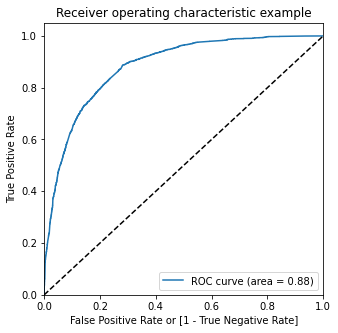

In [514]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

#### Area under the curve is 0.88 and it is a good roc curve 

# Finding optimal cutoff

In [515]:
# let us map the probability of different probabilitiy cutoff and then we would plot then to find balanced 
#specificity and sensitivity
prob = [float(x)/10 for x in range(10)]
for i in prob:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.159943,6487,0,1,1,0,0,0,0,0,0,0,0
1,0,0.029601,4759,0,1,0,0,0,0,0,0,0,0,0
2,0,0.232169,4368,0,1,1,1,0,0,0,0,0,0,0
3,1,0.752467,1467,1,1,1,1,1,1,1,1,1,0,0
4,0,0.089677,5517,0,1,0,0,0,0,0,0,0,0,0


In [516]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381494     1.000000     0.000000
0.1          0.1  0.599702     0.981915     0.363955
0.2          0.2  0.745671     0.919504     0.638451
0.3          0.3  0.784632     0.862766     0.736439
0.4          0.4  0.801272     0.770922     0.819991
0.5          0.5  0.807900     0.703191     0.872485
0.6          0.6  0.792614     0.588298     0.918635
0.7          0.7  0.774080     0.502128     0.941820
0.8          0.8  0.745671     0.390780     0.964567
0.9          0.9  0.687094     0.198227     0.988626


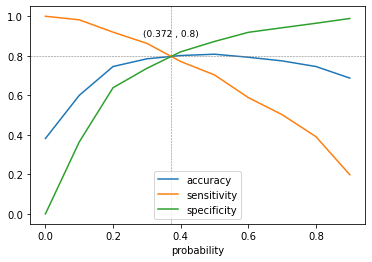

In [517]:
# plotting the curve
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['probability'], cutoff_df['sensitivity'], kind='linear')
acc_interp = interp1d(cutoff_df['probability'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['probability'], cutoff_df['specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

### optimal cutoff we got is 0.372

In [518]:
# mapping again the same cutoff and check the model performance
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.372 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,ID,final_predicted
0,0,0.159943,6487,0
1,0,0.029601,4759,0
2,0,0.232169,4368,0
3,1,0.752467,1467,1
4,0,0.089677,5517,0


# model evaluation at cutoff 0.372

In [519]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.7991071428571429


In [536]:
def log_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    FN =confusion_matrix[1,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    FPR = FP/(FP + TN)  # False positive rate   
    FNR = FN/(FN +TP)   #False Negative rate
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,3))
    print ("Model Sensitivity                : ", round(sensitivity,3))
    print ("Model Specificity                : ", round(specificity,3))
    print ("Model Precision                  : ", round(precision,3))
    print ("Model Recall                     : ", round(recall,3))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,3))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,3))
    print ("Model False Negative Rate (FNR)  : ", round(FNR,3))
    
    

In [537]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("_____"*20,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("_____"*20,"\n")

log_metrics(confusion_matrix)

print("\n")
print("_____"*20,"\n")

____________________________________________________________________________________________________ 

Confusion Matrix
[[3674  898]
 [ 587 2233]] 

____________________________________________________________________________________________________ 

True Negative                    :  3674
True Positive                    :  2233
False Negative                   :  587
False Positve                    :  898
Model Accuracy                   :  0.799
Model Sensitivity                :  0.792
Model Specificity                :  0.804
Model Precision                  :  0.713
Model Recall                     :  0.792
Model True Positive Rate (TPR)   :  0.792
Model False Positive Rate (FPR)  :  0.196
Model False Negative Rate (FNR)  :  0.208


____________________________________________________________________________________________________ 



Model accuracy should be around 80 percent as asked by ceo and we can see the model has accuracy of 0.799 = 0.8 = 80%

### precision and Recall plot 

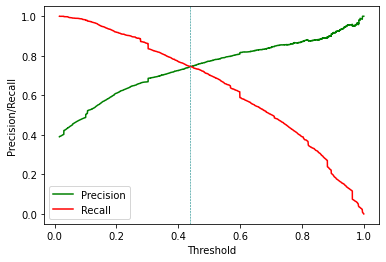

In [532]:
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

plt.axvline(x=0.438, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [533]:
#Creating a copy of the model to check whihc model to be selected 
y_train_precision_recall = y_train_pred_final.copy()

In [534]:
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( 
    lambda x: 1 if x > 0.438 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,ID,final_predicted,precision_recall_prediction
0,0,0.159943,6487,0,0
1,0,0.029601,4759,0,0
2,0,0.232169,4368,0,0
3,1,0.752467,1467,1,1
4,0,0.089677,5517,0,0


In [538]:
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], 
                                            y_train_precision_recall['precision_recall_prediction'])

print("_____"*20,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("_____"*20,"\n")

log_metrics(confusion_matrix)

print("\n")
print("_____"*20,"\n")

____________________________________________________________________________________________________ 

Confusion Matrix
[[3851  721]
 [ 714 2106]] 

____________________________________________________________________________________________________ 

True Negative                    :  3851
True Positive                    :  2106
False Negative                   :  714
False Positve                    :  721
Model Accuracy                   :  0.806
Model Sensitivity                :  0.747
Model Specificity                :  0.842
Model Precision                  :  0.745
Model Recall                     :  0.747
Model True Positive Rate (TPR)   :  0.747
Model False Positive Rate (FPR)  :  0.158
Model False Negative Rate (FNR)  :  0.253


____________________________________________________________________________________________________ 



### As we have seen that the model sensitivity has increased but specificity has decreased a lot to 0.74 but the CEO wants it to be 0.8 which we have got in senitivity and specitiy tradeoff models. so it is better we go with the previous model.

# so we would go with the model of cutoff 0.372 and lets add a score to the leads which would describe that higher score means more likely to be converted and lower score means less likely to be converted. 

In [539]:
y_train_pred_final['Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,ID,final_predicted,Score
0,0,0.159943,6487,0,16
1,0,0.029601,4759,0,3
2,0,0.232169,4368,0,23
3,1,0.752467,1467,1,75
4,0,0.089677,5517,0,9


# Makng predictions on the test set

In [540]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 4608 to 7352
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          1848 non-null   int64  
 1   TotalVisits                                           1848 non-null   float64
 2   Total Time Spent on Website                           1848 non-null   int64  
 3   Page Views Per Visit                                  1848 non-null   float64
 4   A free copy of Mastering The Interview                1848 non-null   int64  
 5   Lead Origin_Landing Page Submission                   1848 non-null   uint8  
 6   Lead Origin_Lead Add Form                             1848 non-null   uint8  
 7   Lead Origin_Lead Import                               1848 non-null   uint8  
 8   Lead Origin_Quick Add Form                            1

In [543]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
4608,0,8.0,252,2.67,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7935,1,2.0,929,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4043,1,1.0,2,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7821,0,2.0,323,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
856,0,3.0,201,3.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [542]:
ncol

['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits']

In [544]:
X_test[ncol] = scaler.transform(X_test[ncol])


In [545]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
4608,0,0.64,0.110915,0.356000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7935,1,0.16,0.408891,0.266667,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4043,1,0.08,0.000880,0.133333,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7821,0,0.16,0.142165,0.266667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
856,0,0.24,0.088468,0.400000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [546]:
rfecol

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Unknown']

In [547]:
len(rfecol)

14

In [548]:
X_test = X_test[rfecol]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Others,What is your current occupation_Unknown
4608,0,0.64,0.110915,1,0,0,0,1,0,0,0,0,0,0
7935,1,0.16,0.408891,1,0,0,0,0,0,0,0,0,0,1
4043,1,0.08,0.000880,1,0,0,0,0,0,0,0,0,1,0
7821,0,0.16,0.142165,1,0,0,0,1,0,0,0,0,1,0
856,0,0.24,0.088468,1,0,0,0,1,0,0,0,0,0,1


In [554]:
# adding constant and make predication of y test usiing X_test 
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(1848, 15)

In [555]:
y_test_pred = logmf.predict(X_test_sm)

In [556]:
y_test_pred[:10]

4608    0.238515
7935    0.029626
4043    0.005882
7821    0.077435
856     0.051927
927     0.075276
318     0.907085
1018    0.132285
8151    0.327840
1570    0.962521
dtype: float64

In [557]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.23851455, 0.0296264 , 0.00588151, 0.07743466, 0.05192664,
       0.07527612, 0.90708459, 0.13228467, 0.32783979, 0.96252148])

In [558]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,ID
0,1,0.238515,4608
1,0,0.029626,7935
2,0,0.005882,4043
3,0,0.077435,7821
4,0,0.051927,856


In [560]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.372 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,ID,final_predicted
0,1,0.238515,4608,0
1,0,0.029626,7935,0
2,0,0.005882,4043,0
3,0,0.077435,7821,0
4,0,0.051927,856,0


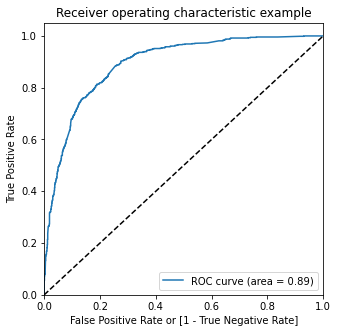

In [561]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"])

### Area under the curve is 0.89 which is a very good model and business acceptance

## Model evaluation of test set

In [562]:
confusion_matrix = metrics.confusion_matrix(y_test_pred_final['Converted'], 
                                            y_test_pred_final['final_predicted'])

print("_____"*20,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("_____"*20,"\n")

log_metrics(confusion_matrix)

print("\n")
print("_____"*20,"\n")

____________________________________________________________________________________________________ 

Confusion Matrix
[[887 220]
 [134 607]] 

____________________________________________________________________________________________________ 

True Negative                    :  887
True Positive                    :  607
False Negative                   :  134
False Positve                    :  220
Model Accuracy                   :  0.808
Model Sensitivity                :  0.819
Model Specificity                :  0.801
Model Precision                  :  0.734
Model Recall                     :  0.819
Model True Positive Rate (TPR)   :  0.819
Model False Positive Rate (FPR)  :  0.199
Model False Negative Rate (FNR)  :  0.181


____________________________________________________________________________________________________ 



## We can see the model is very good model 
Accuracy: 80.8 %
Sensitivity: 81.9%
specificity: 80.1%
we have recall: 81.9%

In [565]:
params = logmf.params.sort_values(ascending=False)
params

Total Time Spent on Website                4.478814
Lead Source_Welingak Website               3.082976
Lead Origin_Lead Add Form                  3.045473
Last Activity_Others                       1.854357
Last Activity_SMS Sent                     1.834202
Lead Source_Olark Chat                     1.311766
TotalVisits                                0.717152
Last Activity_Unreachable                  0.646639
Last Activity_Email Opened                 0.597641
Last Activity_Olark Chat Conversation     -0.698817
Lead Origin_Landing Page Submission       -1.080343
Specialization_Others                     -1.112613
What is your current occupation_Unknown   -1.356362
Do Not Email                              -1.364515
const                                     -1.633886
dtype: float64

### High positive coefficient means positively correlated and vice versa

In [564]:
## Adding score to the model
y_test_pred_final['Score'] = y_test_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Converted_Prob,ID,final_predicted,Score
0,1,0.238515,4608,0,24
1,0,0.029626,7935,0,3
2,0,0.005882,4043,0,1
3,0,0.077435,7821,0,8
4,0,0.051927,856,0,5


## So it means high score means higher conversion rate and vice versa

# Train set 
### Model Accuracy                   :  0.799
### Model Sensitivity                :  0.792
### Model Specificity                :  0.804



# Test set
### Model Accuracy                   :  0.808
### Model Sensitivity                :  0.819
### Model Specificity                :  0.801

# Top 3 positive conntributor

### Total Time Spent on Website                4.478814
### Lead Source_Welingak Website               3.082976
### Lead Origin_Lead Add Form                  3.045473

# Recommendations: 
### Focus more on factors with positive coeeficients
### also analyse the factors negatively affect the convesrion and work upon them 